In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np

Задание:
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1.satisfaction_level​ - Уровень удовлетворенности работой
2.Last_evaluation ​- Время с момента последней оценки в годах
3.number_projects​ - Количество проектов, выполненных за время работы
4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
5.time_spend_company​ - Стаж работы в компании в годах
6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
7.left​ - уволился ли сотрудник
8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет
9.department ​- отдел в котором работает сотрудник
10.salary​ - относительный уровень зарплаты

Требуется выполнить следующее задание:
Задание                                                               Баллы
1 Загрузите файл HR.csv в pandas dataframe                              5
2 Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).   10
3 Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.   10
4 Рассчитайте сколько сотрудников работает в каждомдепартаменте.  5
5 Показать распределение сотрудников по зарплатам.  5
6 Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности  5
7 Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низкимокладом   10 
8 Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности): 10
●Доля сотрудников с повышением за последние 5 лет
●Средняя степень удовлетворенности
●Среднее количество проектов
9 Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary)Оценить качество модели на тестовой выборки 20 
10 Загрузить jupyter notebook с решение на github и прислать ссылку 5 
Итого - максимум 85 баллов
Для зачета необходимо набрать минимум 55

 **Задание 1: Загрузите файл HR.csv в pandas dataframe** 

In [3]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


**Задание 2: Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)**

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [15]:
#Выводы: с помощью функции describe() получаем основные статистики для переменных (count - общее количество строк, 
# mean - среднее, std - сред.отклонение, min - минимальное значение, 25%, 50%, 75% -соответствующие квантили, 
# max - максимальное значение) )

In [15]:
# т.к. в .describe() нет моды, то считаем моду для каждого столбца 

mode_dict = {}
for col in df.columns:
    mode = df[col].mode()[0]
#моды складываем в словарь
    mode_dict.setdefault(col,mode)

# объединяем датафрейм из основных значений  из .describe() и датафрейм из словаря с модами
res = pd.concat([df.describe(), pd.DataFrame([mode_dict])]).round(2)
# преименовываем индексы, чтобы указать индекс 'mode'
res.index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'mode']
res

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,NaN,NaN
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02,NaN,NaN
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14,NaN,NaN
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00,NaN,NaN
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00,NaN,NaN
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00,NaN,NaN
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00,NaN,NaN
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00,NaN,NaN
mode,0.10,0.55,4.00,135.00,3.00,0.00,0.00,0.00,sales,low


In [9]:
# добавили mode -моду

**Задание 3: Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные**

In [11]:
df.corr()
# с помощью функции .corr() получаем корреляционную матрицу, далее получаем аналогично с помощью методов Спирмана и Кенделла


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [18]:
df.corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205
Work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000


In [19]:
df.corr(method='kendall')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005,0.046298,-0.300675,0.018332
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842,-0.004749,-0.002010,-0.005903
number_project,0.022077,0.266267,1.000000,0.306987,0.195025,0.002096,-0.017601,-0.002666
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466,-0.004966,0.038045,-0.002417
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000,-0.024839,0.244851,0.032059
Work_accident,0.046298,-0.004749,0.002096,-0.004966,-0.024839,1.000000,-0.154622,0.039245
left,-0.300675,-0.002010,-0.017601,0.038045,0.244851,-0.154622,1.000000,-0.061788
promotion_last_5years,0.018332,-0.005903,-0.002666,-0.002417,0.032059,0.039245,-0.061788,1.000000


<AxesSubplot:>

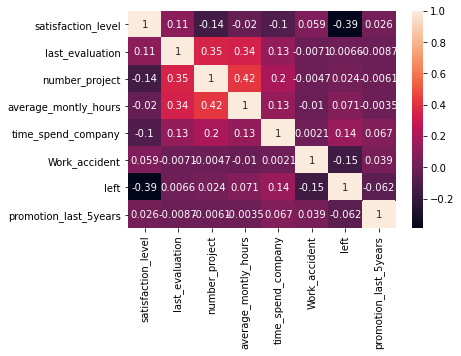

In [12]:
sns.heatmap(df.corr(), annot=True)
# Визуализируем матрицу корреляции с помощью тепловой карты с проставленными значениями коэффициента корреляции
# Визуально определяем:
#Самые скоррелированные Average_montly_hours и number_project (Логично больше проектов - больше времени тратится на работу)
#Самые нескоррелированные Left и satisfaction_level (логично - увилились самые неудовлетворенные работой люди)

**Задание 4: Рассчитайте сколько сотрудников работает в каждом департаменте**

In [18]:
df.groupby(['department']).count()['satisfaction_level']
#получаем количество сотрудников в каждом департаменте (первый столбец - департамент, второй - кол-во сотрудников)

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

**Задание 5: Показать распределение сотрудников по зарплатам**

In [17]:
df.groupby(['salary']).count()['satisfaction_level']
# получаем распределение сотрудников по зарплатам high - 1237 человек, low - 7316 человек, medium - 6446 человек

salary
high      1237
low       7316
medium    6446
Name: satisfaction_level, dtype: int64

**Задание 6: Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности**

In [20]:
df.groupby(['department', 'salary']).count()['satisfaction_level']
# получаем  распределение сотрудников по зарплатам в каждом департаменте по отдельности

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: satisfaction_level, dtype: int64

**Задание  7: Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом**

In [22]:
#Формулируем гипотезы:
# H0 - в среднем сотрудники с высоким и низким окладом одинаково проводят время на работе
# H1 - в среднем сотрудники с высоким и низким окладом проводят разное время на работе

#формируем соответствующие выборки количества отработанных часов для: high- сотрудников с высокой з/п, low - сотрудников с низкой з/п
high = df[df.salary == 'high']['average_montly_hours']
low = df[df.salary == 'low']['average_montly_hours']
alpha = 0.05
result = st.ttest_ind (high, low, equal_var = False)

print('Среднее кол-во часов на работе сотрудников с высокой з/п:', high.mean())
print('Среднее кол-во часов на работе сотрудников с низкой з/п:', low.mean())
print(result)
# смотрим pvalue, сравниваем с alpha, в зависимости от значения выводим соответствующий print
if result.pvalue < alpha and result.statistic > 0:
    print('Отвергаем нулевую гипотезу, сотрудники проводят на работе разное время, с высокой з/п перерабатывают на:', result.statistic)
elif result.pvalue < alpha and result.statistic < 0:
    print('Отвергаем нулевую гипотезу, сотрудники проводят на работе разное время, с низкой з/п перерабатывают на:', result.statistic)
else:
    print('Не отвергаем нулевую гипотезу, сотрудники работают одинаковое время')

Среднее кол-во часов на работе сотрудников с высокой з/п: 199.86742118027485
Среднее кол-во часов на работе сотрудников с низкой з/п: 200.9965828321487
Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу, сотрудники работают одинаковое время


In [23]:
# Вывод: Не отвергаем нулевую гипотезу, сотрудники работают одинаковое время, т.к. pvalue > alpha

**Задание 8: Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
●Доля сотрудников с повышением за последние 5 лет
●Средняя степень удовлетворенности
●Среднее количество проектов**

In [26]:
#сформируем выборки  left -уволенные, current - текущие сотрудники
left = df[df.left == 1]
current = df[df.left == 0]

# находим долю  уволенных сотрудников с повышением за последние 5 лет,
# количество таких сотрудников делим на общее число уволенных сотрудников

left_segment_5years = left[left.promotion_last_5years == 1].count()[1]/left.count()[1]*100
print('Процент уволенных сотрудников с повышением за последние 5 лет:', round(left_segment_5years, 2), '%')

# находим среднюю степень удовлетворенности уволенных сотрудников
left_satisfaction_level = left.satisfaction_level.mean()
print('Средняя степень удовлетворенности уволенных сотрудников:', round(left_satisfaction_level, 2))

# находим среднее количество проектов уволенных сотрудников
left_number_project= left.number_project.mean()
print('Среднее количество проектов уволенных сотрудников:', round(left_number_project, 2))

# аналогично для текущих
current_segment_5years = current[current.promotion_last_5years == 1].count()[1]/current.count()[1]*100
print('Процент текущих сотрудников с повышением за последние 5 лет:', round(current_segment_5years, 2), '%')

current_satisfaction_level = current.satisfaction_level.mean()
print('Средняя степень удовлетворенности текущих сотрудников:', round(current_satisfaction_level, 2))

current_number_project= current.number_project.mean()
print('Среднее количество проектов текущих сотрудников:', round(current_number_project, 2))

Процент уволенных сотрудников с повышением за последние 5 лет: 0.53 %
Средняя степень удовлетворенности уволенных сотрудников: 0.44
Среднее количество проектов уволенных сотрудников: 3.86
Процент текущих сотрудников с повышением за последние 5 лет: 2.63 %
Средняя степень удовлетворенности текущих сотрудников: 0.67
Среднее количество проектов текущих сотрудников: 3.79


**Задание 9: Разделить данные на тестовую и обучающую выборки.
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
Оценить качество модели на тестовой выборки**

In [27]:
# выводим df , чтобы был перед глазами
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [28]:

# делим датафрейм на: датафрейм с необходимыми столбцами (x) и на Series уволенных(y)
x = df[['satisfaction_level', 'last_evaluation',  'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# обучаем данные
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [106]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
# комментарий аспиранта из slack на мой вопрос:вот проблема в том, что y_test - серия пандаса, данные по индексу объединяются, а там индексы перемешаны и в результате получаются nan. попробуйте y_test = np.array(y_test).
# реализовал, как подсказали
y_test = np.array(y_test)
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.columns = ['Уволен факт', 'Уволен прогноз']
result

,Уволен факт,Уволен прогноз
0,0,0
1,0,0
2,0,0
3,1,1
4,1,0
...,...,...
3745,0,0
3746,1,0
3747,1,0
3748,0,0


In [31]:
# Оценка качества модели на тестовой выборки:
# расчет точности - отношение верный прогнозов к общему количеству позиций
#0,77 -вывод: достаточно хорошо предсказывает
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7712